## Stroke Risk Prediction Using Three(3) Different Machine Learning Algorithms

This project is aimed at predicting whether a patient will have stroke or not using 3 different machine learning algorithms, and determining which of the algorithms is most accurate for the prediction. This prediction will help the patients in taking measures that will enable them to avert the future risk of getting stroke, esepecially as it entails working in regards to the interractions between causal factors, predisposing factors and unhealthy lifestyles that can lead to stroke.

The dataset used for this project is available on Kaggel, and contains medicals records and important features needed to make predictions which will aid in making the right predictions.

![title](Pictures\stroke.JPG)

By: **Nwuguru Chidiebere Sullivan**

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


## Importing Different Packages Needed For The Project

In [119]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 12)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler 
import warnings
warnings.filterwarnings('ignore')

#### Load and get the view of our dataset

In [3]:
stroke_df = pd.read_csv("stroke.csv")
print(stroke_df.shape)
stroke_df.head()

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#let's drop our id column because it is not going to be relevant to our model
stroke_df.drop(columns='id', inplace=True)

In [5]:
stroke_df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


### Let's get the general information about the dataset including the descriptive statistics

In [6]:
print('The Shape of stroke_df is:',stroke_df.shape)

The Shape of stroke_df is: (5110, 11)


###### Observation: We now have 5110 rows, and 11 columns in our dataset

In [7]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


###### Observation: It appears that there're missing values in the bmi column but we'll attend to that during the wrangling stage

In [8]:
#Get the statistics of the numerical data
round(stroke_df.describe(),2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,43.23,0.1,0.05,106.15,28.89,0.05
std,22.61,0.3,0.23,45.28,7.85,0.22
min,0.08,0.0,0.00,55.12,10.30,0.00
25%,25.00,0.0,0.00,77.24,23.50,0.00
50%,45.00,0.0,0.00,91.88,28.10,0.00
75%,61.00,0.0,0.00,114.09,33.10,0.00
max,82.00,1.0,1.00,271.74,97.60,1.00


In [9]:
#Get the statistics of the categorical variables
round(stroke_df.describe(exclude=['int64', 'float64']), 2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [10]:
stroke_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## Data Wrangling

#### Check for Missing values:

In [11]:
stroke_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Observation: As we suspected earlier, bmi column has 201 missing values

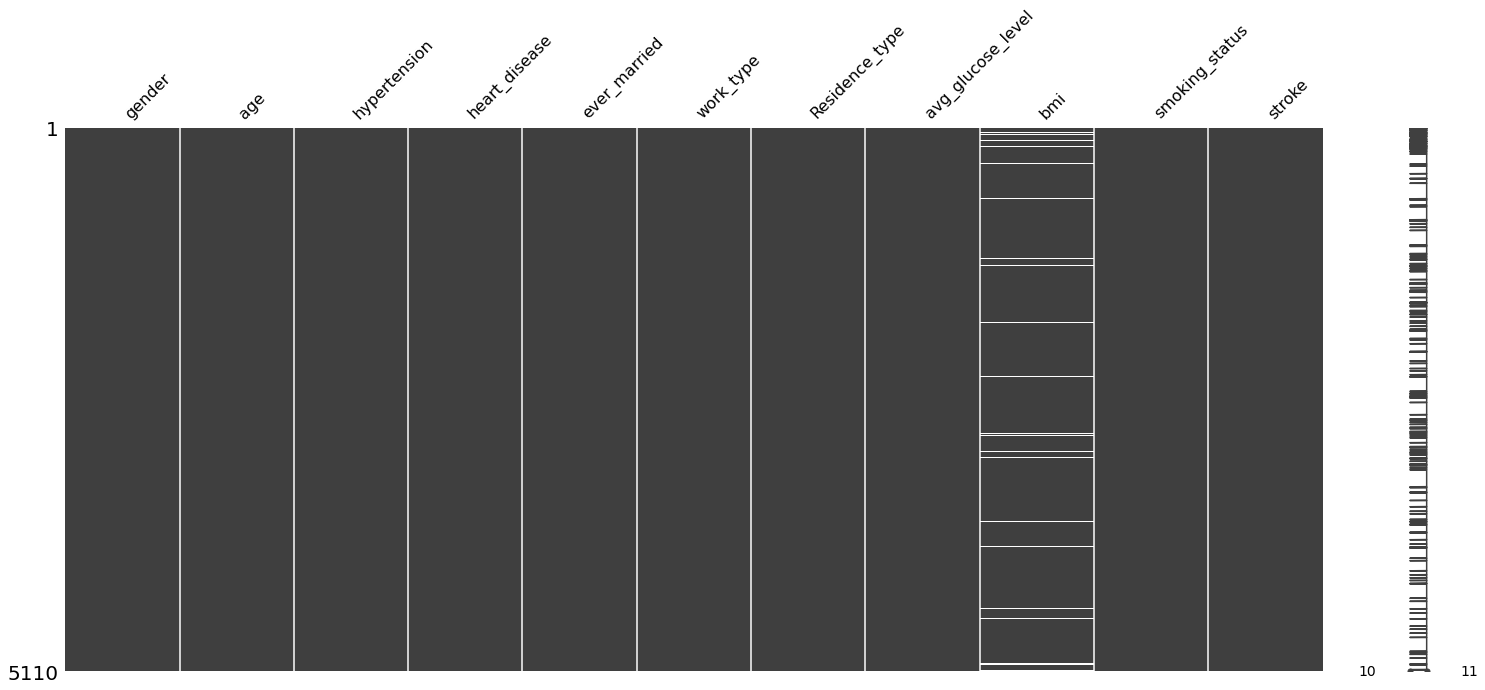

In [12]:
#Let's visualize the missing values
msno.matrix(stroke_df);

#### Observation: The visualization further confirms that there're missing values only in the bmi column

#### Now, we need to take care of the missing values in the bmi column

In [13]:
#fill in the missing values by replacing it with the mean of the bmi column
stroke_df['bmi'].replace(np.NaN, stroke_df['bmi'].mean(), inplace=True)

In [14]:
stroke_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Observation: We've now dealt with the missing values, hence, no missing values in our dataset

#### Let's check for duplicates

In [15]:
stroke_df.duplicated().sum()

0

#### Observation: There's no duplicate

#### Let's check for unique values in all the columns 

In [16]:
#let's know the number of unique values in each column
unique_values = {}

for col in stroke_df.columns:
    unique_values[col] = stroke_df[col].unique().shape[0]

pd.DataFrame(unique_values, index=['NO of unique values']).transpose()

,NO of unique values
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,419
smoking_status,4


In [17]:
columns = ['gender', 'ever_married','work_type', 'Residence_type','smoking_status']

for column in columns:
    unique_values = stroke_df[column].unique()
    print(f"Unique values for {column}:{unique_values}")

Unique values for gender:['Male' 'Female' 'Other']
Unique values for ever_married:['Yes' 'No']
Unique values for work_type:['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values for Residence_type:['Urban' 'Rural']
Unique values for smoking_status:['formerly smoked' 'never smoked' 'smokes' 'Unknown']


#### Let's get sense of the counts  in each category of the gender column

In [18]:
stroke_df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

#### Observation: The 'other' category has only one entry which is very negligible, and so should be added to the 'male' category as it has lower entries than the 'female' category; this will aid in improving the spread.

In [19]:
stroke_df['gender'] = stroke_df['gender'].replace('Other', 'Male')

In [20]:
stroke_df['gender'].value_counts()

Female    2994
Male      2116
Name: gender, dtype: int64

#### Check for multicollinearity

In [21]:
#check for correlation among the numerical columns
correlation = stroke_df.select_dtypes('number').corr()
correlation

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


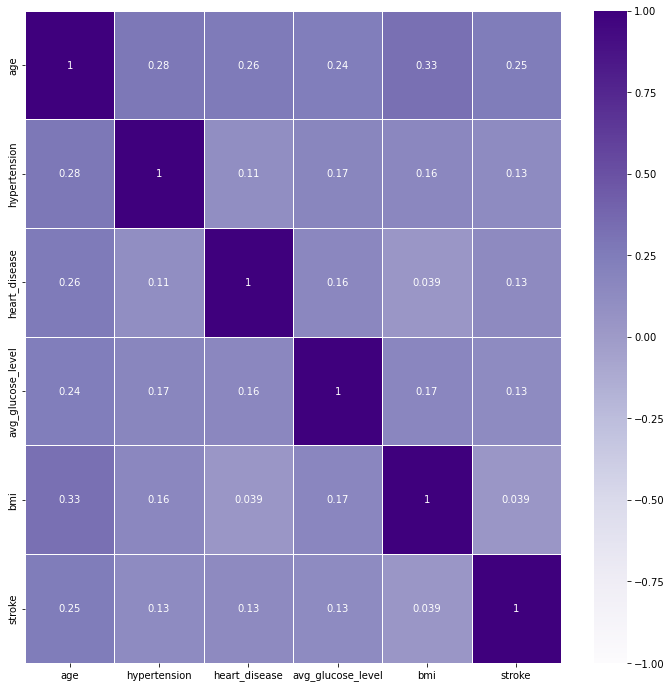

In [22]:
#visualise the correlation
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, cmap='Purples', linewidth=0.5);

**Observation: There's no noteworthy correlation**

#### Let's check for outliers

<Figure size 7560x5760 with 0 Axes>

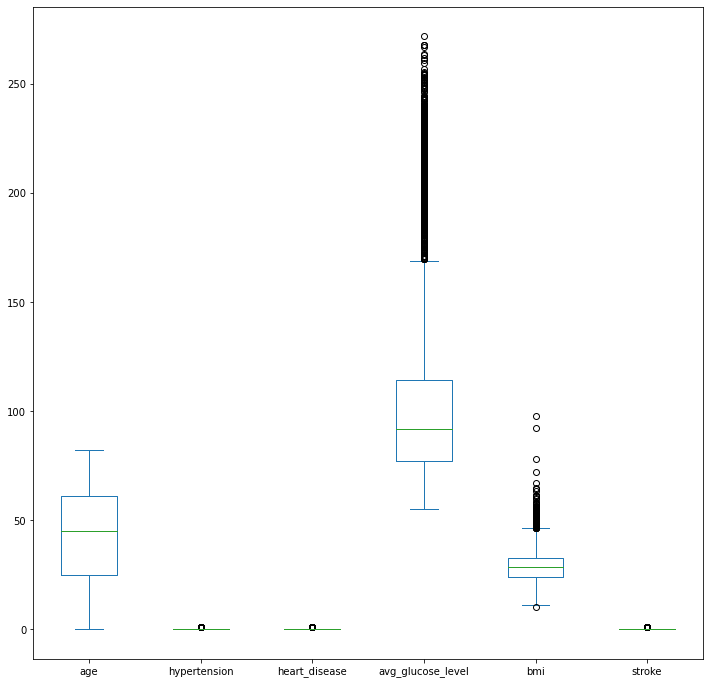

In [23]:
plt.figure(num=None, figsize=(8.4, 6.4), dpi=900, facecolor='w', edgecolor='k')
stroke_df.plot(kind='box')
plt.show();

#### Observation: There're outliers in both avg_glucose_level and bmi columns

In [24]:
stroke_df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [25]:
(stroke_df['avg_glucose_level'] > 125).value_counts()

False    4110
True     1000
Name: avg_glucose_level, dtype: int64

In [26]:
stroke_df['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [27]:
(stroke_df['bmi']>30).value_counts()

False    3217
True     1893
Name: bmi, dtype: int64

#### Inference: We're going to keep our outliers as it is possible to have avg_glucose level above 125mg/dl and bmi above 30kg as seen in the cases of diabetic and obese patients respectively.

### Let's collapse our continous categorical variables(age, bmi, avg_glucose_level) into fewer groups

**Creating age group categories**

In [28]:
print(f'Maximum age variable: {stroke_df["age"].max()}')
print(f'Minimum age variable: {stroke_df["age"].min()}')
print(f'Number of age variables: {stroke_df["age"].nunique()}')

Maximum age variable: 82.0
Minimum age variable: 0.08
Number of age variables: 104


In [29]:
#Collapse age into fewer groups
ranges = [0, 13, 18, 45, 60, 100]
group_names = ['Children', 'Teens', 'Adults', 'Mid-Adults', 'Elderly']
stroke_df['age_group'] = pd.cut(stroke_df['age'], bins=ranges, labels=group_names)
stroke_df['age_group'].unique()

['Elderly', 'Mid-Adults', 'Adults', 'Children', 'Teens']
Categories (5, object): ['Children' < 'Teens' < 'Adults' < 'Mid-Adults' < 'Elderly']

**Grouping bmi**

In [30]:
print(f'Maximum bmi variable: {stroke_df["bmi"].max()}')
print(f'Minimum bmi variable: {stroke_df["bmi"].min()}')
print(f'Number of bmi variables: {stroke_df["bmi"].nunique()}')

Maximum bmi variable: 97.6
Minimum bmi variable: 10.3
Number of bmi variables: 419


In [31]:
#Collapse bmi into fewer groups
ranges = [0, 19, 25, 30, 100]
group_names = ['Underweight', 'Normal', 'Overweight', 'Obesity']
stroke_df['bmi_group'] = pd.cut(stroke_df['bmi'], bins=ranges, labels=group_names)
stroke_df['bmi_group'].unique()

['Obesity', 'Overweight', 'Normal', 'Underweight']
Categories (4, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obesity']

**Grouping avg_glucose_level**

In [32]:
print(f'Maximun avg_glucose_level variable: {stroke_df["avg_glucose_level"].max()}')
print(f'Minimun avg_glucose_level variable: {stroke_df["avg_glucose_level"].min()}')
print(f'Number of avg_glucose_level variable: {stroke_df["avg_glucose_level"].nunique()}')

Maximun avg_glucose_level variable: 271.74
Minimun avg_glucose_level variable: 55.12
Number of avg_glucose_level variable: 3979


In [33]:
ranges= [0, 70, 99, 125, 280]
group_names= ['Low', 'Normal', 'High', 'Very_high']
stroke_df['glucose_level_group'] = pd.cut(stroke_df['avg_glucose_level'], bins=ranges, labels=group_names)
stroke_df['glucose_level_group'].unique()

['Very_high', 'High', 'Normal', 'Low']
Categories (4, object): ['Low' < 'Normal' < 'High' < 'Very_high']

## Exploratory Data Analysis(EDA)

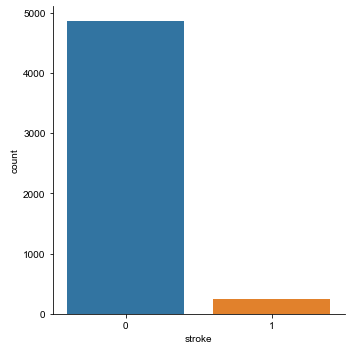

In [34]:
#let's visualize stroke column to get the sense of our target veriable
sns.catplot(data=stroke_df, x='stroke', kind='count')
sns.set_style('white')
plt.show()

In [35]:
stroke_df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

**Observation:** We can clearly see that our data is not balanced. We'll fix the imbalance while training our model.

### Relationship between age and stroke

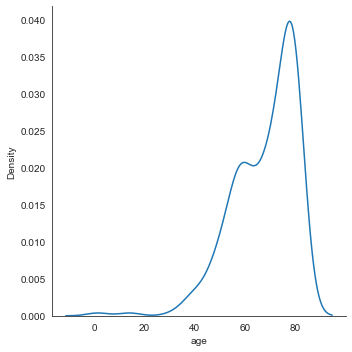

In [37]:
#let's visualize the relationship between age and stroke
stroke = stroke_df[stroke_df['stroke']==1]
sns.displot(stroke['age'], kind='kde')
sns.set_style('darkgrid')
plt.show()

**To make the relationship trend more clearer, let's visualize it across age_group:**

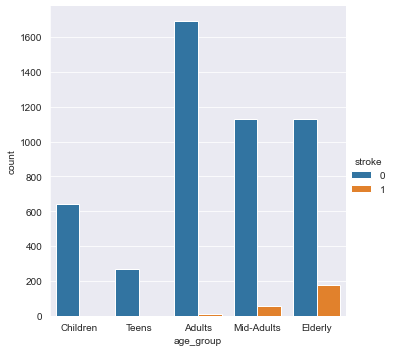

In [38]:
sns.catplot(data=stroke_df, x='age_group', hue='stroke', kind='count')
sns.set_style('white')
plt.show();

#### Observation: Stroke risk appears to increase as age increases.

### Relationship between bmi and stroke

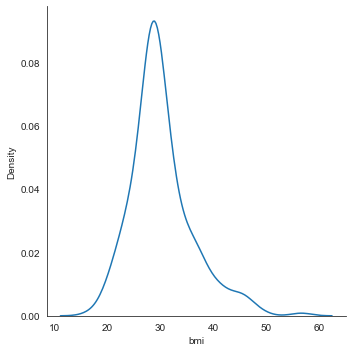

In [39]:
#let's visualize the relationship between avg_glucose_level and stroke
stroke = stroke_df[stroke_df['stroke']==1]
sns.displot(stroke['bmi'], kind='kde')
sns.set_style('darkgrid')
plt.show()

**To make the relationship trend more clearer, let's visualize it across bmi_group:**

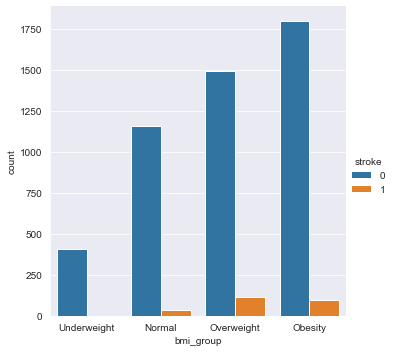

In [40]:
sns.catplot(data=stroke_df, x='bmi_group', kind='count', hue='stroke')
sns.set_style('white')
plt.show();

#### Observation: bmi appears to be dirctly proportional to stroke risk, although fairly, since the risk level peaked among the overweight group and dropped slightly among the obesity group. This could be due to other factors influencing our data.

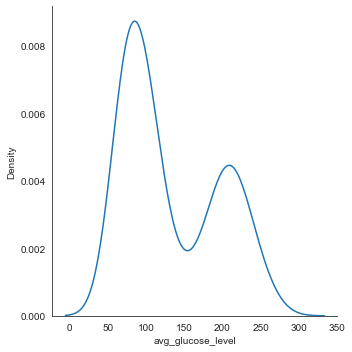

In [41]:
#let's visualize the relationship between avg_glucose_level and stroke
stroke = stroke_df[stroke_df['stroke']==1]
sns.displot(stroke['avg_glucose_level'], kind='kde')
sns.set_style('darkgrid')
plt.show()

**To make the relationship trend more clearer, let's visualize it across glucose_level_group:**

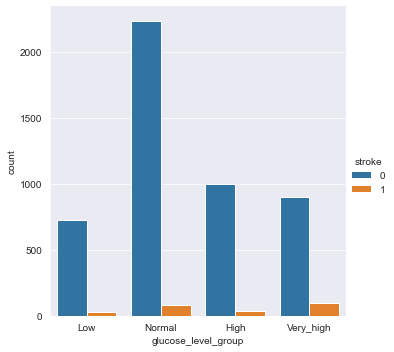

In [42]:
sns.catplot(data=stroke_df, x='glucose_level_group', kind='count', hue='stroke')
sns.set_style('white')
plt.show();

#### Observation: The relationship between avg_glucose_level and stroke appears to be uneven

**Let's see if the age, bmi, avg_glucose_level have some sort of relationship among themselves:**

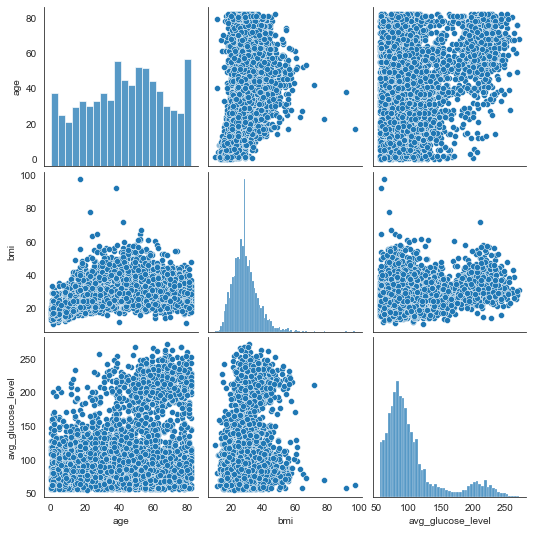

In [44]:
#Visualize the relationships among age, bmi and avg_glucose_level
columns= ['age', 'bmi', 'avg_glucose_level']
sns.pairplot(stroke_df[columns])
plt.show()

**Observation: It appears that there's no noteworthy relationship among these columns**

## Preprocessing

In [45]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               5110 non-null   object  
 1   age                  5110 non-null   float64 
 2   hypertension         5110 non-null   int64   
 3   heart_disease        5110 non-null   int64   
 4   ever_married         5110 non-null   object  
 5   work_type            5110 non-null   object  
 6   Residence_type       5110 non-null   object  
 7   avg_glucose_level    5110 non-null   float64 
 8   bmi                  5110 non-null   float64 
 9   smoking_status       5110 non-null   object  
 10  stroke               5110 non-null   int64   
 11  age_group            5110 non-null   category
 12  bmi_group            5110 non-null   category
 13  glucose_level_group  5110 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 454.8+ KB


In [46]:
columns = ['gender', 'ever_married','work_type', 'Residence_type','smoking_status']

for column in columns:
    unique_values = stroke_df[column].unique()
    print(f"Unique values for {column}:{unique_values}")

Unique values for gender:['Male' 'Female']
Unique values for ever_married:['Yes' 'No']
Unique values for work_type:['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values for Residence_type:['Urban' 'Rural']
Unique values for smoking_status:['formerly smoked' 'never smoked' 'smokes' 'Unknown']


### Binary Encoding:

In [47]:
#Instantiate LabelEncoder
labelencoder = LabelEncoder()

#Binary Encoding(encoding object columns with 2 unique values)
binary_cols =  ['ever_married', 'Residence_type', 'gender']
for col in binary_cols:
    stroke_df[col]=labelencoder.fit_transform(stroke_df[col])

In [48]:
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_group,glucose_level_group
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1,Elderly,Obesity,Very_high
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1,Elderly,Overweight,Very_high
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1,Elderly,Obesity,High
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1,Mid-Adults,Obesity,Very_high
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1,Elderly,Normal,Very_high


### Label Encoding:

In [49]:
#Encode for categorical columns
cat_cols = ['age_group', 'bmi_group', 'glucose_level_group']

for col in cat_cols:
    stroke_df[col] = labelencoder.fit_transform(stroke_df[col])


In [50]:
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_group,glucose_level_group
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1,2,1,3
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1,2,2,3
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1,2,1,0
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1,3,1,3
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1,2,0,3


### One-Hot-Encoding:

In [51]:
#Encode object columns that more than 2 unique values
stroke_df = pd.get_dummies(stroke_df, columns=['work_type', 'smoking_status'], drop_first=True)

In [52]:
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_group,bmi_group,glucose_level_group,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,2,1,3,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,2,2,3,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,2,1,0,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,3,1,3,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,1,2,0,3,0,0,1,0,0,1,0


**Now, we're good to go; all our entries are now encoded with numbers which wil make it easier for our models to comprehend.**

**Befor we finally get into the building of our models, let us once again do a brief EDA by getting the idea of the general distribution of our data**

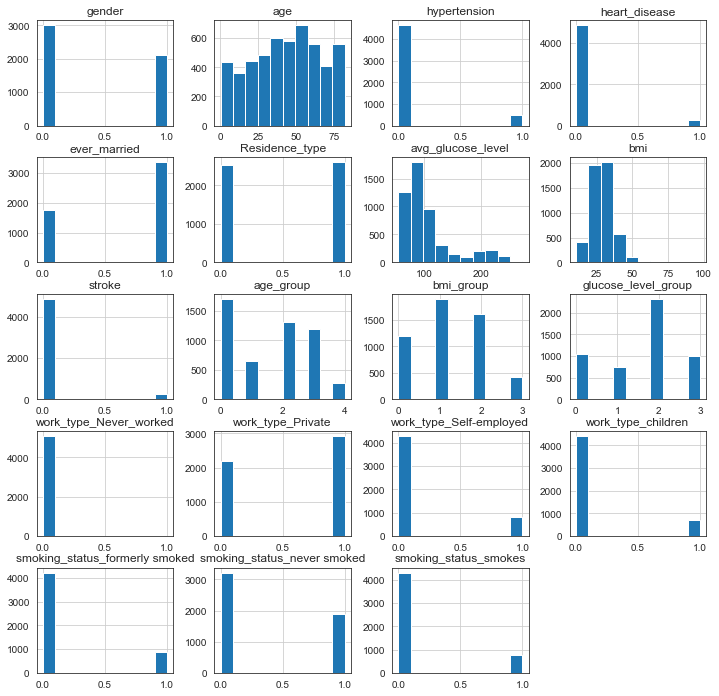

In [53]:
stroke_df.hist();

## Model Building

#### Partioning:

**To avoid having data leakage in our predictive model, we will partition our data into 80% train set, and 20% test set.**

In [83]:
#let's create our feature
X = stroke_df.drop('stroke', axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,age_group,bmi_group,glucose_level_group,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,2,1,3,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,2,2,3,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,2,1,0,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,3,1,3,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,2,0,3,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.893237,2,2,2,0,1,0,0,0,1,0
5106,0,81.0,0,0,1,1,125.20,40.000000,2,1,3,0,0,1,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.600000,0,1,2,0,0,1,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.600000,3,2,3,0,1,0,0,1,0,0


In [84]:
#create the target variable
y = stroke_df['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [99]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)


In [121]:
y_train.value_counts()

0    3889
1     199
Name: stroke, dtype: int64

**Observation:** Our train set is clearly not balanced. Hence, we have to balance it through resampling to avoid bias in our prediction

#### Resampling:

Let's resample our dataset to get a blanced data:

In [123]:
#instantiate randomsampler, then fit and resample the training set
rus = RandomUnderSampler()
rus_X_train, rus_y_train = rus.fit_resample(X_train, y_train)
rus_y_train.value_counts()

0    199
1    199
Name: stroke, dtype: int64

**Observation:** Our data is now balanced

#### Normalization

In [124]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(rus_X_train)
X_test_scaled = scaler.transform(X_test)

### Deploying The Algorithms

**(1) Logistic Regression**

In [125]:
#instantiate, fit, and predict with the logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, rus_y_train)
y_pred = log_reg.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [126]:
#check for the accuracy score of the log_reg
log_reg_accuracy = accuracy_score(y_test, y_pred)
log_reg_accuracy

0.7074363992172211

In [127]:
#evaluate and print the train set accuracy
log_reg_train_accuracy = log_reg.score(X_train_scaled, rus_y_train)
log_reg_train_accuracy

0.8065326633165829

In [128]:
#evaluate and print the test set accuracy
log_reg_test_accuracy = log_reg.score(X_test_scaled, y_test)
log_reg_test_accuracy

0.7074363992172211

**(2) K-Nearest Neighbor**

In [130]:
#instantiate, fit, and predict with K-Nearest Neighbor 
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, rus_y_train)
y_pred = knn.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [131]:
#check for the accuracy score of the knn
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy

0.6555772994129159

In [132]:
#evaluate and print the train set accuracy
knn_train_accuracy= knn.score(X_train_scaled, rus_y_train)
knn_train_accuracy

0.7964824120603015

In [133]:
#evaluate and print the test set accuracy
knn_test_accuracy = knn.score(X_test_scaled, y_test)
knn_test_accuracy

0.6555772994129159

**(3) DecisionTreeClassifier**

Let's perform hyperparameter tuning for our model:

In [140]:
dt = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3,4,5,6,7,8],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3,4],
    'random_state':[0, 42]
}

#perform grid search with cross-validation to obtain the best hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

#print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 0}


In [142]:
#instantiate, fit, and predict with DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=2, random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [146]:
#check for the accuracy score of the dt
dt_accuracy = accuracy_score(y_test, y_pred)
dt_accuracy

0.9510763209393346

In [147]:
#evaluate and print the train set accuracy
dt_train_accuracy = dt.score(X_train, y_train)
dt_train_accuracy

0.9571917808219178

In [148]:
#evaluate and print the test set accuracy
dt_test_accuracy = dt.score(X_test, y_test)
dt_test_accuracy

0.9442270058708415

**Let's check for the feature importance:**

In [158]:
#check for the feature importance
feature_imp_df = pd.DataFrame({
    'Feature Name': X_train.columns,
    'Importance': dt.feature_importances_
})

sorted_feature_imp = feature_imp_df.sort_values(by='Importance', ascending=False)
top10_feature_imp = sorted_feature_imp.head(10)

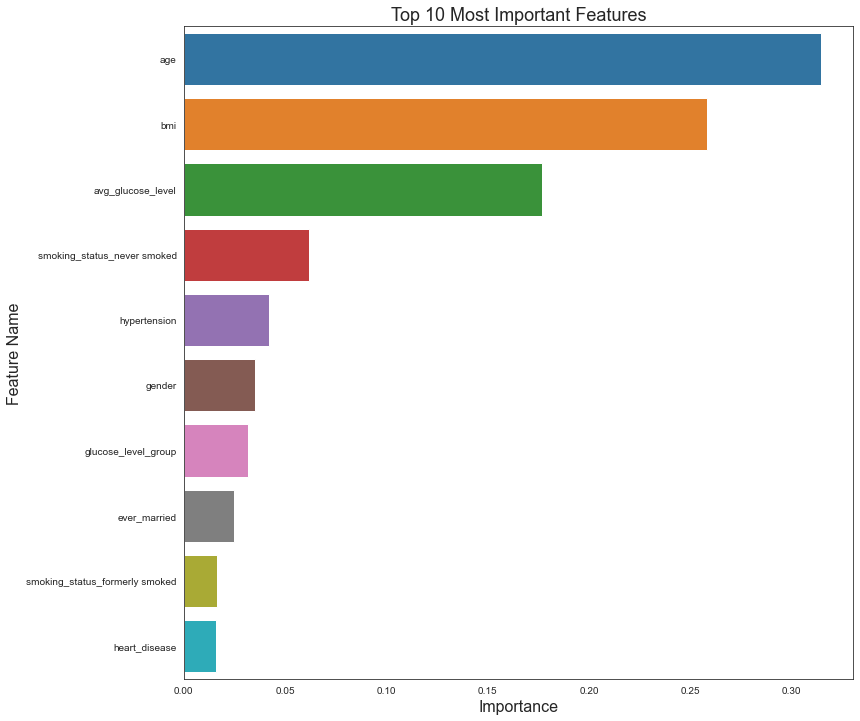

In [162]:
#visualize the feature importance
sns.barplot(data=top10_feature_imp, x='Importance', y='Feature Name')
plt.title('Top 10 Most Important Features', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show();

***Observation: From our bar plot, it appears that the three most important features for predicting stroke are; avg_glucose_level, bmi, and age with avg_glucose_level being the most important***

##### Now, let's compare the accuracy of the three models we've deployed:

In [163]:
data = {'classifier': ['Logistic Regression', 'K-Nearest Neighbor', 'Decision Tree'],
       '% Training Accuracy':[log_reg_train_accuracy*100, knn_train_accuracy*100, dt_train_accuracy*100],
       '% Test Accuracy': [log_reg_test_accuracy*100, knn_test_accuracy*100, dt_test_accuracy*100],
       '% Model Accuracy': [log_reg_accuracy*100, knn_accuracy*100, dt_accuracy*100]}
df = pd.DataFrame(data)
df

,classifier,% Training Accuracy,% Test Accuracy,% Model Accuracy
0,Logistic Regression,80.653266,70.743640,70.743640
1,K-Nearest Neighbor,79.648241,65.557730,65.557730
2,Decision Tree,95.719178,94.422701,95.107632


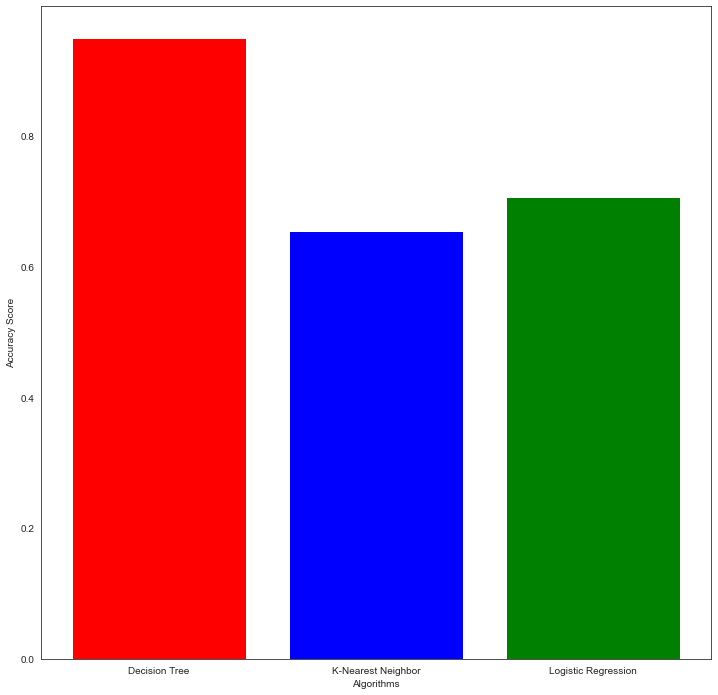

In [164]:
#let's visualize this comparison
models = ['Decision Tree', 'K-Nearest Neighbor', 'Logistic Regression']
accuracy = [dt_accuracy, knn_accuracy, log_reg_accuracy]
plt.bar(models, accuracy, color=['red', 'blue', 'green'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.show();

### Observation: Decision Tree algorithm with the accuracy score of 95.1% performed better  

**The End, thank you!!!**